# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Martinus Aditya Nusa Gumilang
- **Email:** nusagumilang@gmail.com
- **ID Dicoding:** nusagumilang

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada bulan apakah terjadi penyewaan sepeda terbanyak?
- Pertanyaan 2: Secara deskriptif, manakah jumlah penyewa sepeda yang lebih banyak, hari masuk atau hari libur?
- Pertanyaan 3: Secara deskriptif, pada musim manakah jumlah penyewaan sepeda tertinggi?
- Pertanyaan 4: Apakah terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012?
- Pertanyaan 5: Pada jam berapakah penyewaan sepeda mencapai puncak?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Untuk analisis
import numpy as np
import pandas as pd

# Untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Melakukan *extract* dataset dari file .zip dengan menggunakan *command* Expand-Archive melalui shell.

In [31]:
# Melakukan unzip dataset
!Powershell.exe Expand-Archive Bike-sharing-dataset.zip -DestinationPath .

Memasukkan data yang telah ter-*extract* ke dalam variabel "day" dan "hour".

In [114]:
# Memasukan data ke variabel
day = pd.read_csv("./day.csv")
hour = pd.read_csv("./hour.csv")

### Assessing Data

#### Melihat Konteks Data

Berdasarkan deskripsi, data berasal dari sistem *bike sharing* atau peminjaman sepeda pada tahun 2011 hingga 2012. Selanjutnya akan dilihat data apa saja yang termuat.

In [115]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [116]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Sesuai dengan deskripsi, data memiliki 17 kolom pada data **hour** dan 16 kolom pada data **day**. Perbedaan antara kedua data ada pada kolom 'hr' yang hanya dimiliki oleh data **hour**, kolom tersebut menunjukkan jam dimana data baris tersebut diambil.

Selanjutnya dapat diamati bahwa terdapat kolom 'casual', 'registered', dan 'cnt'. Menurut penjelasan pada deskripsi, kolom 'casual' adalah jumlah *user casual*, kolom 'registered' adalah jumlah *user registered*, dan kolom 'cnt' adalah jumlah total sepeda yang disewakan, baik *casual* maupun *registered*. Pernyataan ini sedikit membuat bingung karena kolom 'casual' dan 'registered' merupakan jumlah *user*, bukan jumlah sepeda. Diamati pula bahwa secara perhitungan bahwa kolom 'cnt' merupakan hasil jumlahan antara kolom 'casual' dan kolom 'registered', akan ditunjukkan sebagai berikut:

In [117]:
# Data day
hitung_cnt = 0
for i in range(0, len(day)):
  jumlah_casual_regis = day['casual'][i] + day['registered'][i]
  if jumlah_casual_regis == day['cnt'][i]:
    hitung_cnt += 1

print("Jumlah baris dengan data jumlahan kolom 'casual' dan 'registered' = 'cnt' pada data day adalah sebanyak {}.".format(hitung_cnt))
print("Apakah jumlah tersebut sama dengan jumlah seluruh baris pada data? Jawabannya: {}".format(hitung_cnt == len(day)))

Jumlah baris dengan data jumlahan kolom 'casual' dan 'registered' = 'cnt' pada data day adalah sebanyak 731.
Apakah jumlah tersebut sama dengan jumlah seluruh baris pada data? Jawabannya: True


In [118]:
# Data hour
hitung_cnt = 0
for i in range(0, len(hour)):
  jumlah_casual_regis = hour['casual'][i] + hour['registered'][i]
  if jumlah_casual_regis == hour['cnt'][i]:
    hitung_cnt += 1

print("Jumlah baris dengan data jumlahan kolom 'casual' dan 'registered' = 'cnt' pada data hour adalah sebanyak {}.".format(hitung_cnt))
print("Apakah jumlah tersebut sama dengan jumlah seluruh baris pada data? Jawabannya: {}".format(hitung_cnt == len(hour)))

Jumlah baris dengan data jumlahan kolom 'casual' dan 'registered' = 'cnt' pada data hour adalah sebanyak 17379.
Apakah jumlah tersebut sama dengan jumlah seluruh baris pada data? Jawabannya: True


Didapatkan bahwa jumlah baris dengan data jumlahan kolom 'casual' dan 'registered' = 'cnt' adalah sama dengan seluruh baris data. Sehingga disimpulkan bahwa kolom 'cnt' betul merupakan hasil jumlahan data *user*.

Berdasarkan hasil tersebut, akan diambil asumsi bahwa jumlah *user* adalah sama dengan jumlah sepeda yang disewakan, yang berarti jumlah sepeda pada 'cnt' merepresentasikan total jumlah sepeda yang dipesan oleh *user*.

#### Melihat Data Lebih Dekat

##### Data **day**

In [119]:
# Sekilas data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Secara sekilas, data terlihat "normal" tanpa ada sesuatu yang perlu penanganan khusus.

In [120]:
# Informasi umum data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan informasi tentang data harian di atas, dapat dilihat bahwa terdapat beberapa hal yang perlu menjadi catatan sebagai berikut:

- Tidak ditemukan *missing value* pada data.
- Kolom 'dteday' perlu diubah menjadi tipe data datetime karena merupakan tanggal.
- Kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', dan 'weathersit' merupakan data kategorikal (ada yang *binary* dan *non-binary*) dengan kodefikasi bilangan bulat (integer) sehingga perlu disesuaikan dengan maknanya.
- Kolom 'instant' perlu dicek lebih lanjut.

Selanjutnya akan dilakukan pengecekan terhadap kolom 'instant'

In [121]:
# Pengurutan kolom 'instant'
day['instant'].sort_values()

0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64

Ditemukan bahwa kolom 'instant' merupakan id dari baris data yang mana tidak dibutuhkan dalam analisis karena telah diwakilkan oleh *index*.

Berikutnya akan dicek nilai-nilai statistik deskriptif dari kolom numerik pada data harian.

In [122]:
# Deskripsi data numerik
day[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak terlihat adanya kejanggalan pada kolom numerik data harian.

Selanjutnya, dari kolom-kolom kategorik yang telah diidentifikasi, akan dilihat kategori-kategori apa saja yang termuat dan apakah terdapat data yang perlu dibenahi.

In [123]:
# Data kategorik 'season'
day['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [124]:
# Data kategorik 'yr'
day['yr'].value_counts()

yr
1    366
0    365
Name: count, dtype: int64

In [125]:
# Data kategorik 'mnth'
day['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     57
Name: count, dtype: int64

In [126]:
# Data kategorik 'holiday'
day['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [127]:
# Data kategorik 'weekday'
day['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: count, dtype: int64

In [128]:
# Data kategorik 'workingday'
day['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [129]:
# Data kategorik 'weathersit'
day['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

Dari hasil pengecekan di atas, tidak terlihat adanya kejanggalan pada data kolom kategorik.

Selanjutnya dicek apakah terdapat duplikasi data.

In [130]:
# Cek duplikasi data
day[day.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Tidak ditemukan duplikasi data.

##### Data **hour**

In [131]:
# Sekilas data
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Secara sekilas, data terlihat "normal" tanpa ada sesuatu yang perlu penanganan khusus.

In [132]:
# Informasi umum data
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan informasi tentang data harian di atas, dapat dilihat bahwa terdapat beberapa hal yang perlu menjadi catatan sebagai berikut:

- Tidak ditemukan *missing value* pada data.
- Kolom 'dteday' perlu diubah menjadi tipe data datetime karena merupakan tanggal.
- Kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', dan 'hr' merupakan data kategorikal (ada yang *binary* dan *non-binary*) dengan kodefikasi bilangan bulat (integer) sehingga perlu disesuaikan dengan maknanya.
- Kolom 'instant' perlu dicek lebih lanjut.

Selanjutnya akan dilakukan pengecekan terhadap kolom 'instant'.

In [133]:
# Pengurutan kolom 'instant'
hour['instant'].sort_values()

0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64

Ditemukan bahwa kolom 'instant' merupakan id dari baris data yang mana tidak dibutuhkan dalam analisis karena telah diwakilkan oleh *index*.

Berikutnya akan dicek nilai-nilai statistik deskriptif dari kolom numerik pada data jam-an.

In [134]:
# Deskripsi data numerik
hour[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak terlihat adanya kejanggalan pada kolom numerik data jam-an.

Selanjutnya, dari kolom-kolom kategorik yang telah diidentifikasi, akan dilihat kategori-kategori apa saja yang termuat dan apakah terdapat data yang perlu dibenahi.

In [135]:
# Data kategorik 'season'
hour['season'].value_counts()

season
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

In [136]:
# Data kategorik 'yr'
hour['yr'].value_counts()

yr
1    8734
0    8645
Name: count, dtype: int64

In [137]:
# Data kategorik 'mnth'
hour['mnth'].value_counts()

mnth
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

In [138]:
# Data kategorik 'holiday'
hour['holiday'].value_counts()

holiday
0    16879
1      500
Name: count, dtype: int64

In [139]:
# Data kategorik 'weekday'
hour['weekday'].value_counts()

weekday
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

In [140]:
# Data kategorik 'workingday'
hour['workingday'].value_counts()

workingday
1    11865
0     5514
Name: count, dtype: int64

In [141]:
# Data kategorik 'weathersit'
hour['weathersit'].value_counts()

weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64

In [142]:
# Data kategorik 'hr'
hour['hr'].value_counts()

hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

Dari hasil pengecekan di atas, tidak terlihat adanya kejanggalan pada data kolom kategorik.

Selanjutnya dicek apakah terdapat duplikasi data.

In [143]:
# Cek duplikasi data
hour[hour.duplicated()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Tidak ditemukan duplikasi data.

##### Kesimpulan

Pada kedua data, yaitu data harian dan jam-an, disimpulkan bahwa:

- Kedua data memiliki kolom yang sama, kecuali kolom 'hr' yang menunjukkan jam diambilnya data.
- Tidak ditemukan *missing value* pada data.
- Kolom 'dteday' perlu diubah menjadi tipe data datetime karena merupakan tanggal.
- Kolom 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', dan 'hr' merupakan data kategorikal (ada yang *binary* dan *non-binary*) dengan kodefikasi bilangan bulat (integer) sehingga perlu disesuaikan dengan maknanya.
- Kolom 'instant' merupakan id dari baris data yang mana tidak dibutuhkan dalam analisis karena telah diwakilkan oleh *index*.
- Data kolom numerik tidak memerlukan perlakuan apapun.
- Nomor-nomor kode pada data kolom kategorik perlu diubah sesuai dengan maknanya.

### Cleaning Data

#### Mengubah Tipe Data

##### Data **day**

In [144]:
# Mengubah tipe data
day['dteday'] = pd.to_datetime(day['dteday'])

print(day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Data **hour**

In [145]:
# Mengubah type data
hour['dteday'] = pd.to_datetime(hour['dteday'])

print(hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Menghapus Kolom 'instant'

##### Data **day**

In [146]:
# Melakukan drop kolom 'instant'
day = day.drop('instant', axis = 1)

##### Data **hour**

In [147]:
# Melakukan drop kolom 'instant'
hour = hour.drop('instant', axis = 1)

#### Mengubah Kode Kolom Kategorik Menjadi Maknanya

Pertama-tama akan dibuat *dictionary* yang berisi nomor kode untuk masing-masing kolom dan maknanya.

In [148]:
season_code = {1: 'Musim dingin',
               2: 'Musim semi',
               3: 'Musim panas',
               4: 'Musim gugur'}
yr_code = {0: '2011',
           1: '2012'}
mnth_code = {1: 'Januari',
             2: 'Februari',
             3: 'Maret',
             4: 'April',
             5: 'Mei',
             6: 'Juni',
             7: 'Juli',
             8: 'Agustus',
             9: 'September',
             10: 'Oktober',
             11: 'November',
             12: 'Desember'}
holiday_code = {0: 'Bukan hari libur',
                1: 'Hari libur'}
weekday_code = {0: 'Minggu',
                1: 'Senin',
                2: 'Selasa',
                3: 'Rabu',
                4: 'Kamis',
                5: 'Jumat',
                6: 'Sabtu'}
workingday_code = {0: 'Bukan hari kerja',
                   1: 'Hari kerja'}
weathersit_code = {1: 'Clear, Few clouds, Partly cloudy',
                   2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                   3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                   4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'}

Selanjutnya, data kolom kategorik akan disesuaikan.

##### Data **day**

In [149]:
# Data harian
day = day.replace({'season': season_code,
                   'yr': yr_code,
                   'mnth': mnth_code,
                   'holiday': holiday_code,
                   'weekday': weekday_code,
                   'workingday': workingday_code,
                   'weathersit': weathersit_code})
day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Musim dingin,2011,Januari,Bukan hari libur,Sabtu,Bukan hari kerja,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Musim dingin,2011,Januari,Bukan hari libur,Minggu,Bukan hari kerja,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Musim dingin,2011,Januari,Bukan hari libur,Senin,Hari kerja,"Clear, Few clouds, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Musim dingin,2011,Januari,Bukan hari libur,Selasa,Hari kerja,"Clear, Few clouds, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Musim dingin,2011,Januari,Bukan hari libur,Rabu,Hari kerja,"Clear, Few clouds, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


##### Data **hour**

In [150]:
# Data jam-an
hour = hour.replace({'season': season_code,
                   'yr': yr_code,
                   'mnth': mnth_code,
                   'holiday': holiday_code,
                   'weekday': weekday_code,
                   'workingday': workingday_code,
                   'weathersit': weathersit_code})
hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Musim dingin,2011,Januari,0,Bukan hari libur,Sabtu,Bukan hari kerja,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Musim dingin,2011,Januari,1,Bukan hari libur,Sabtu,Bukan hari kerja,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Musim dingin,2011,Januari,2,Bukan hari libur,Sabtu,Bukan hari kerja,"Clear, Few clouds, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Musim dingin,2011,Januari,3,Bukan hari libur,Sabtu,Bukan hari kerja,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Musim dingin,2011,Januari,4,Bukan hari libur,Sabtu,Bukan hari kerja,"Clear, Few clouds, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore Univariat

In [151]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    object        
 3   mnth        731 non-null    object        
 4   holiday     731 non-null    object        
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    object        
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.8+ 

#### Data Numerik

##### Jumlah Persewaan ('cnt')

<Axes: xlabel='cnt', ylabel='Count'>

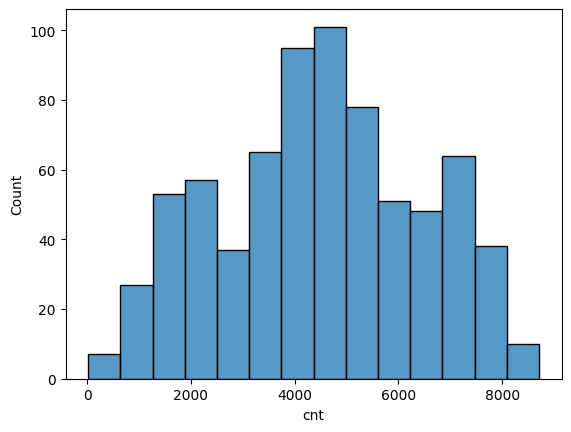

In [152]:
sns.histplot(day['cnt'])

<Axes: xlabel='cnt', ylabel='Count'>

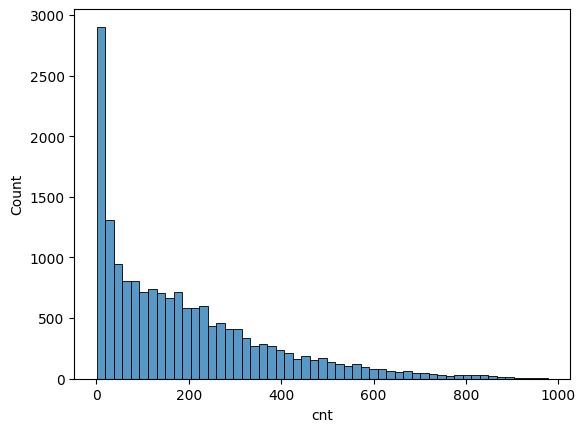

In [153]:
sns.histplot(hour['cnt'])

Dapat diamati bahwa pada data harian, jumlah persewaan cenderung terpusat pada titik tengah data dan relatif simetris untuk kedua sisinya. Sedangkan pada data jam-an, terlihat bahwa data terpusat pada nilai 0 dan sangat jelas data skew ke kanan.

##### Suhu Lingkungan ('temp')

<Axes: xlabel='temp', ylabel='Count'>

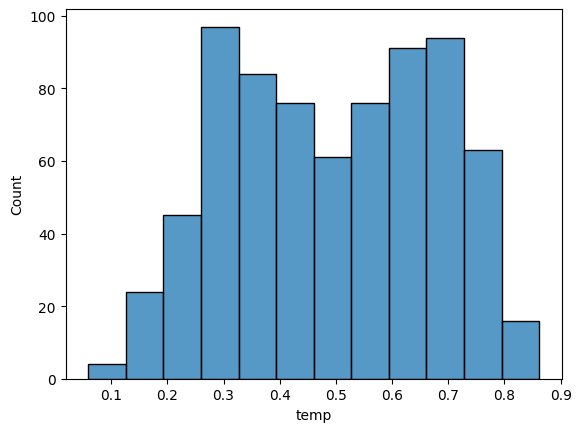

In [154]:
sns.histplot(day['temp'])

<Axes: xlabel='temp', ylabel='Count'>

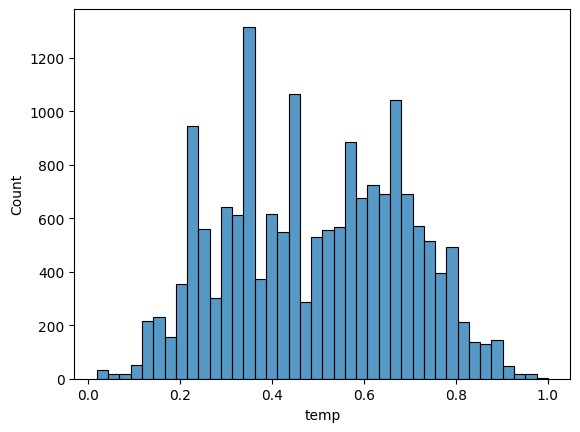

In [155]:
sns.histplot(hour['temp'])

Dari plot di atas dapat diamati bahwa suhu lingkungan terdistribusi secara cukup merata dengan titik pusat pada 2 tempat, yaitu sekitar 0.3 dan 0.7.

##### Suhu yang Dirasakan ('atemp')

<Axes: xlabel='atemp', ylabel='Count'>

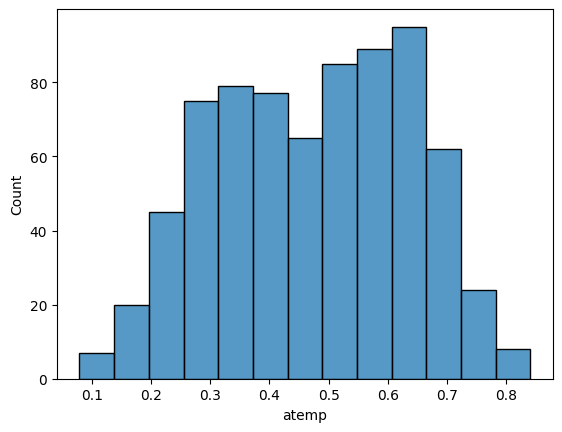

In [156]:
sns.histplot(day['atemp'])

<Axes: xlabel='atemp', ylabel='Count'>

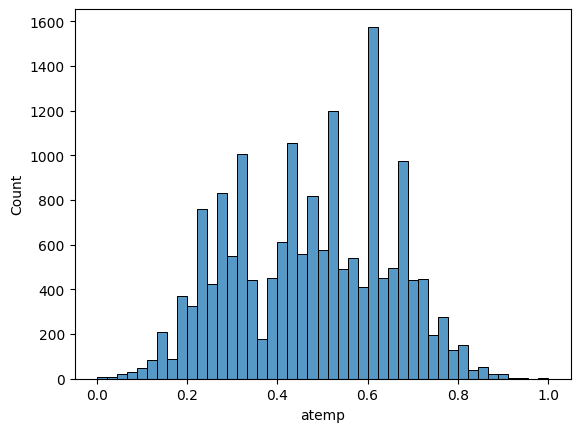

In [157]:
sns.histplot(hour['atemp'])

Dari plot di atas dapat diamati bahwa suhu yang dirasakan terdistribusi secara cukup merata dengan titik pusat pada 2 tempat, yaitu sekitar 0.3 dan 0.7. Namun berbeda dengan suhu lingkungan, suhu yang dirasakan terlihat lebih banyak pada sekitar 0.7.

##### Kelembaban ('hum')

<Axes: xlabel='hum', ylabel='Count'>

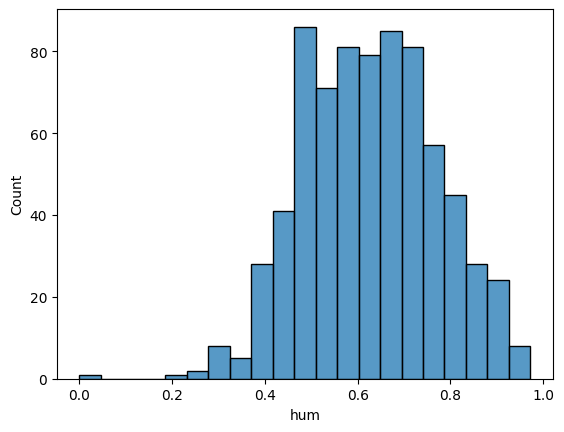

In [158]:
sns.histplot(day['hum'])

<Axes: xlabel='hum', ylabel='Count'>

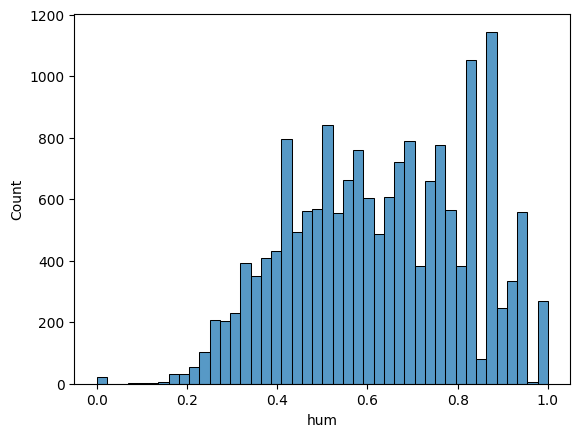

In [159]:
sns.histplot(hour['hum'])

Dari plot di atas dapat diamati bahwa kelembaban terdistribusi secara cukup merata terutama pada data harian dengan titik pusat pada sekitar 0.6. Pada data jam-an, terdapat jumlah data yang paling banyak pada sekitar 0.9. Terdapat indikasi *outlier* yaitu pada sekitar 0.

<Axes: ylabel='hum'>

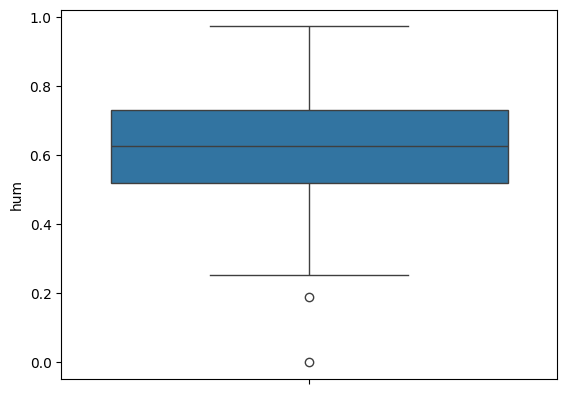

In [160]:
sns.boxplot(day['hum'])

<Axes: ylabel='hum'>

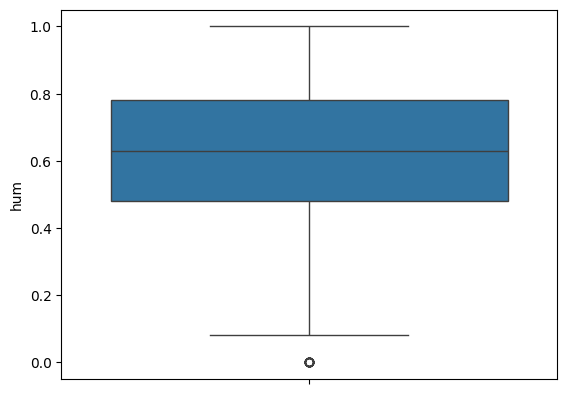

In [161]:
sns.boxplot(hour['hum'])

Dugaan adanya data *outlier* ternyata didukung oleh boxplot yang menunjukkan adanya *outlier* pada 0. Pada data harian, terdapat data *outlier* lain yaitu pada 0.2, tetapi pada data jam-an tidak dianggap sebagai *outlier*.

##### Kecepatan Angin ('windspeed')

<Axes: xlabel='windspeed', ylabel='Count'>

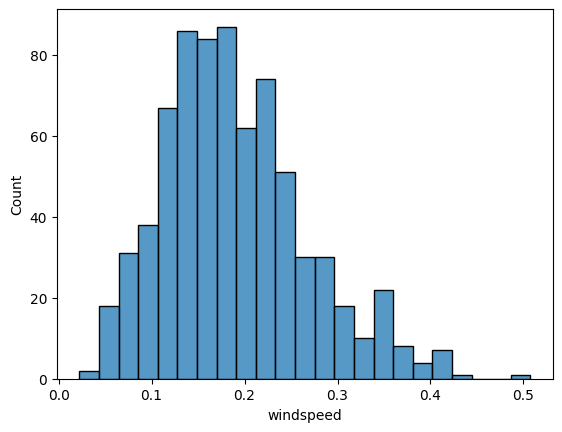

In [162]:
sns.histplot(day['windspeed'])

<Axes: xlabel='windspeed', ylabel='Count'>

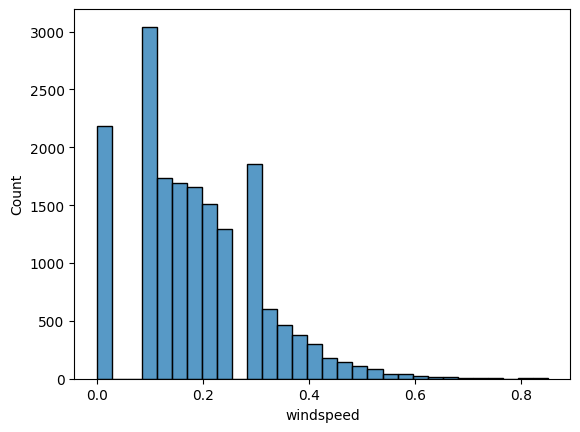

In [163]:
sns.histplot(hour['windspeed'], bins = 30)

Dari plot di atas dapat diamati bahwa kecepatan angin terdistribusi secara cukup merata pada data harian, tetapi terdapat indikasi data *outlier* pada 0.5. Data jam-an terlihat tersegmentasi dengan *range* data yang tidak memiliki nilai. Data juga terlihat skew ke kanan dan mengindikasikan terdapat outlier.

<Axes: ylabel='windspeed'>

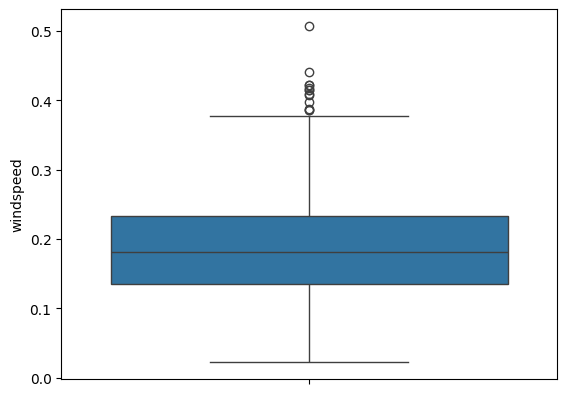

In [164]:
sns.boxplot(day['windspeed'])

<Axes: ylabel='windspeed'>

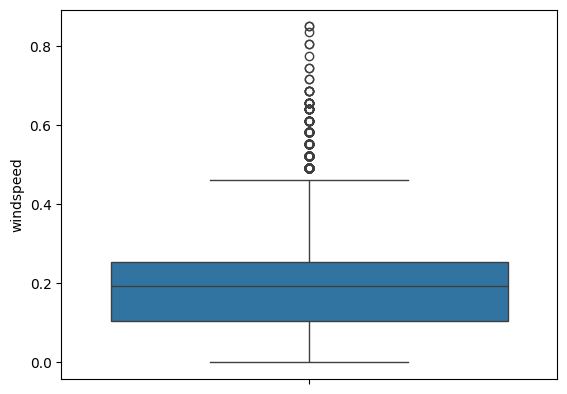

In [165]:
sns.boxplot(hour['windspeed'])

Dugaan adanya data *outlier* ternyata didukung oleh boxplot yang menunjukkan adanya *outlier* pada 0.4 ke atas.

#### Data Kategorik

Data kategorik pada data kebanyakan merupakan bagian dari tanggal sehingga tidak bervariasi.

##### Cuaca ('weathersit')

<Axes: xlabel='weathersit', ylabel='count'>

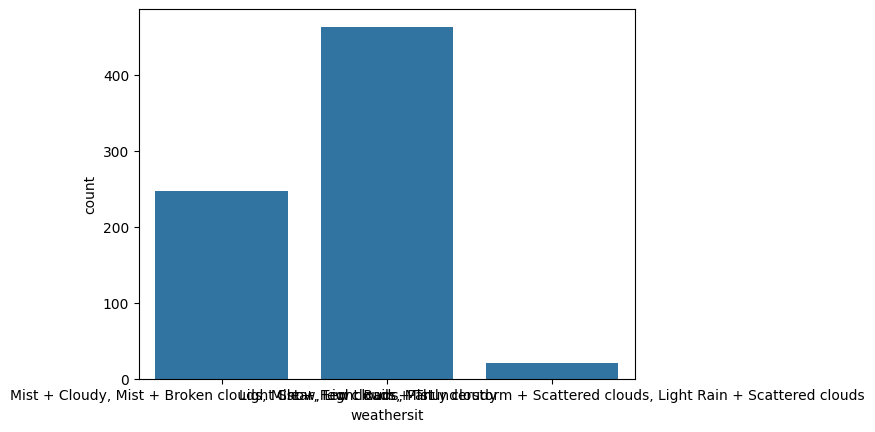

In [166]:
sns.countplot(data = day, x = 'weathersit')

<Axes: xlabel='weathersit', ylabel='count'>

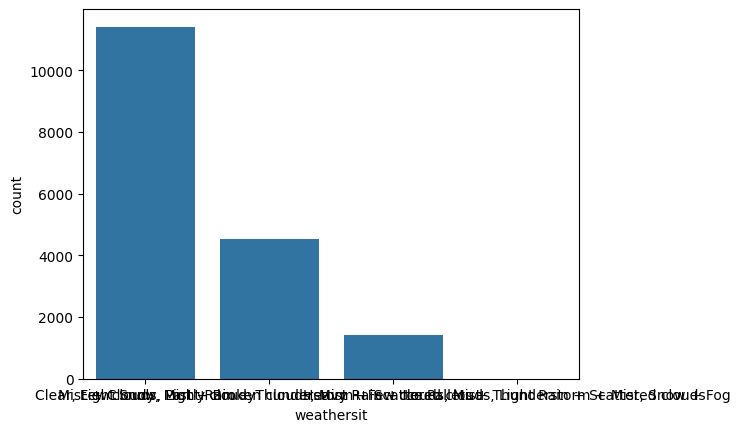

In [167]:
sns.countplot(data = hour, x = 'weathersit')

Dari grafik di atas, dapat diamati bahwa cuaca 1 (cerah) paling banyak terjadi dan cuaca 4 (ekstrem: hujan es, badai petir, dll) sangat jarang terjadi, bahkan hanya dimunculkan pada data jam-an.

### Explore Multivariat

#### Korelasi antar variabel

In [168]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   yr          731 non-null    object        
 3   mnth        731 non-null    object        
 4   holiday     731 non-null    object        
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    object        
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(7)
memory usage: 85.8+ 

In [169]:
korelasi = day.select_dtypes(include = 'number').corr()
korelasi

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


<Axes: >

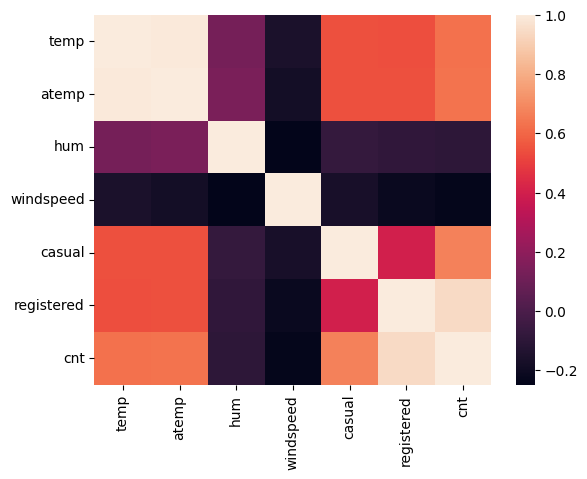

In [170]:
sns.heatmap(korelasi)

Korelasi dari *feature* atau kolom-kolom data yang ada cukup bervariasi. Pada kolom 'cnt' yang mewakili jumlah penyewaan sepeda, korelasi terbesar adalah dengan kolom 'registered'. Hal ini sangat masuk akal karena kolom 'cnt' merupakan hasil jumlahan kolom 'registered' dengan 'casual'. Selanjutnya, kolom yang memiliki korelasi tinggi adalah suhu lingkungan ('temp') dan suhu yang dirasakan ('atemp'). Kedua *feature* ini memiliki hubungan linearitas yang kuat dengan 'cnt'.

### Menjawab Pertanyaan

##### Pertanyaan 1: Pada bulan apakah terjadi penyewaan sepeda terbanyak?

In [171]:
bulan_terbanyak = day[['mnth', 'cnt']].groupby('mnth').sum().sort_values('cnt', ascending = False)
bulan_terbanyak

,cnt
mnth,
Agustus,351194
Juni,346342
September,345991
Juli,344948
Mei,331686
Oktober,322352
April,269094
November,254831
Maret,228920


<Axes: xlabel='mnth', ylabel='cnt'>

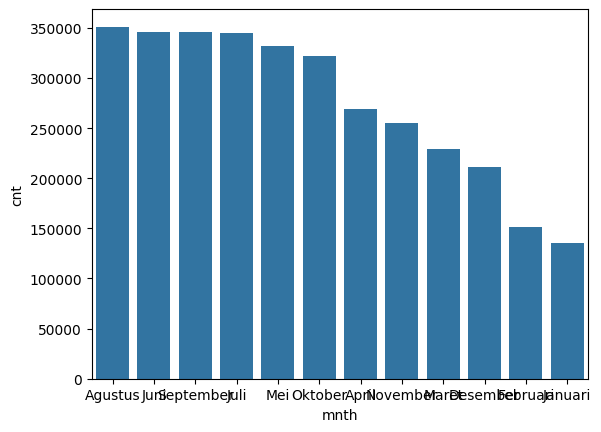

In [172]:
sns.barplot(data = bulan_terbanyak, x = bulan_terbanyak.index, y = bulan_terbanyak['cnt'], order = bulan_terbanyak.index)

Jawaban: Penyewaan sepeda terbanyak terjadi pada bulan Agustus.

##### Pertanyaan 2: Secara deskriptif, manakah jumlah penyewa sepeda yang lebih banyak, hari masuk atau hari libur?

In [173]:
cnt_workingday = day[['workingday', 'cnt']].groupby('workingday').mean().sort_values('cnt', ascending = False)

print("Rata-rata penyewa sepeda pada hari libur adalah {} dan rata-rata penyewa sepeda hari masuk adalah {}.".format(cnt_workingday['cnt'][0], cnt_workingday['cnt'][1]))

Rata-rata penyewa sepeda pada hari libur adalah 4584.82 dan rata-rata penyewa sepeda hari masuk adalah 4330.168831168831.


C:\Users\Papa\AppData\Local\Temp\ipykernel_6836\2147985844.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rata-rata penyewa sepeda pada hari libur adalah {} dan rata-rata penyewa sepeda hari masuk adalah {}.".format(cnt_workingday['cnt'][0], cnt_workingday['cnt'][1]))


<Axes: xlabel='workingday', ylabel='cnt'>

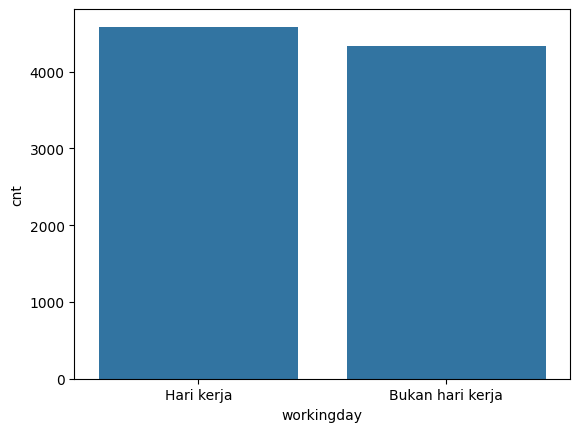

In [174]:
sns.barplot(data = cnt_workingday, x = cnt_workingday.index, y = 'cnt')

Jawaban: Berdasarkan hasil rata-rata di atas, didapatkan bahwa penyewa sepeda di hari masuk (hari kerja) lebih banyak daripada di hari libur (bukan hari kerja) dengan perbedaan sebesar kurang lebih 200 penyewa.

##### Pertanyaan 3: Secara deskriptif, pada musim manakah jumlah penyewaan sepeda tertinggi?

In [175]:
cnt_season = day[['season', 'cnt']].groupby('season').mean().sort_values('cnt', ascending = False)
cnt_season

,cnt
season,
Musim panas,5644.303191
Musim semi,4992.331522
Musim gugur,4728.162921
Musim dingin,2604.132597


<Axes: xlabel='season', ylabel='cnt'>

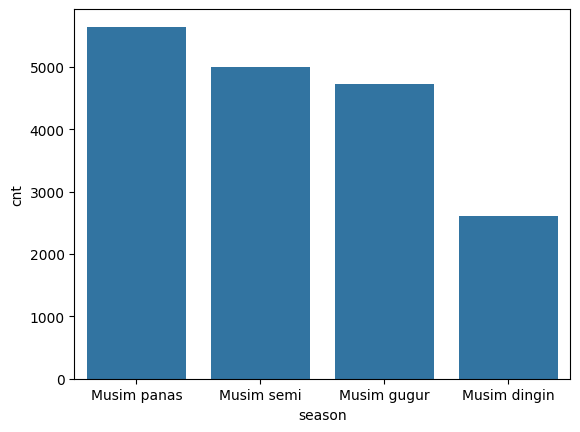

In [176]:
sns.barplot(data = cnt_season, x = cnt_season.index, y = 'cnt', order = cnt_season.index)

Jawaban: Penyewaan sepeda terbanyak terjadi pada musim panas (3: *summer*).

##### Pertanyaan 4: Apakah terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012?

Menggunakan perhitungan rata-rata:

In [177]:
cnt_yr = day[['yr', 'cnt']].groupby('yr').mean()
cnt_yr

,cnt
yr,
2011,3405.761644
2012,5599.934426


<Axes: xlabel='yr', ylabel='cnt'>

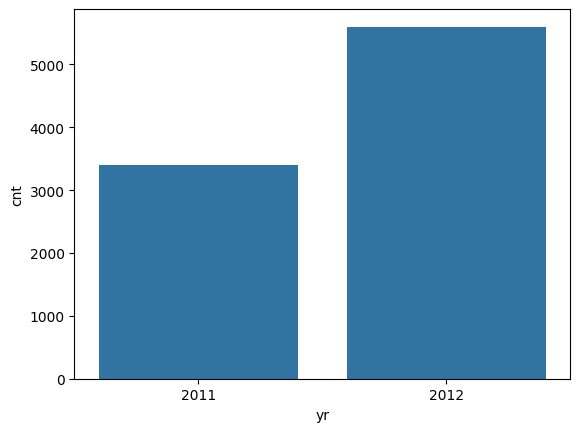

In [178]:
sns.barplot(data = cnt_yr, x = cnt_yr.index, y = 'cnt')

Menggunakan grafik garis:

(array([14975., 15065., 15156., 15248., 15340., 15431., 15522., 15614.,
        15706.]),
 [Text(14975.0, 0, '2011-01'),
  Text(15065.0, 0, '2011-04'),
  Text(15156.0, 0, '2011-07'),
  Text(15248.0, 0, '2011-10'),
  Text(15340.0, 0, '2012-01'),
  Text(15431.0, 0, '2012-04'),
  Text(15522.0, 0, '2012-07'),
  Text(15614.0, 0, '2012-10'),
  Text(15706.0, 0, '2013-01')])

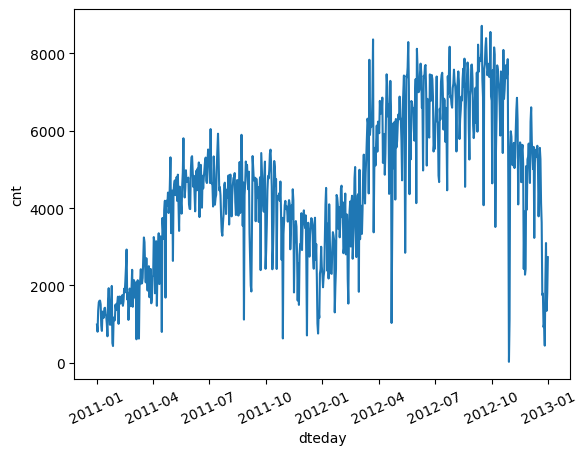

In [179]:
sns.lineplot(data = day, x = "dteday", y = "cnt")
plt.xticks(rotation = 25)

Jawaban: Menggunakan perhitungan rata-rata didapatkan bahwa terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012. Selanjutnya, dengan metode grafik terlihat jelas bahwa terdapat peningkatan sehingga dapat disimpulkan bahwa terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012. Diamati pula bahwa terdapat tren naik.

##### Pertanyaan 5: Pada jam berapakah penyewaan sepeda mencapai puncak?

In [181]:
cnt_hour = hour[['hr', 'cnt']].groupby('hr').mean().sort_values('cnt', ascending = False)
cnt_hour

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


<Axes: xlabel='hr', ylabel='cnt'>

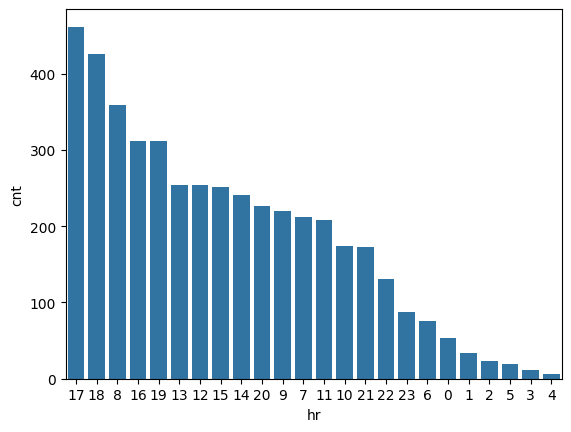

In [182]:
sns.barplot(data = cnt_hour, x = cnt_hour.index, y = cnt_hour['cnt'], order = cnt_hour.index)

Jawaban: Penyewaan sepeda mencapai puncak pada jam 17.

#### Analisis Lanjutan

Selanjutnya, akan diproyeksikan tren untuk tahun berikutnya. Metode yang akan digunakan adalah metode statistik regresi linear sederhana dengan variabel prediktor adalah hari dalam tahun dan variabel respon adalah jumlah penyewaan sepeda.

In [183]:
from scipy.stats import linregress

x = day['dteday'].dt.dayofyear
y = day['cnt']

res = linregress(x, y)
print(res)

LinregressResult(slope=5.0902555865808425, intercept=3571.5577601148793, rvalue=0.2774325354968584, pvalue=2.1967688192391383e-14, stderr=0.6528698633259922, intercept_stderr=138.05264838290358)


Didapatkan hasil seperti di atas, dengan konstanta sebesar 3571.5577601148793 dan koefisien untuk 'x' sebesar 5.0902555865808425. Selanjutnya akan diproyeksikan jumlah penyewaan untuk tahun 2013. Tahun 2013 bukan merupakan tahun kabisat sehingga memiliki hari sebanyak 365.

<Axes: xlabel='dteday', ylabel='dteday'>

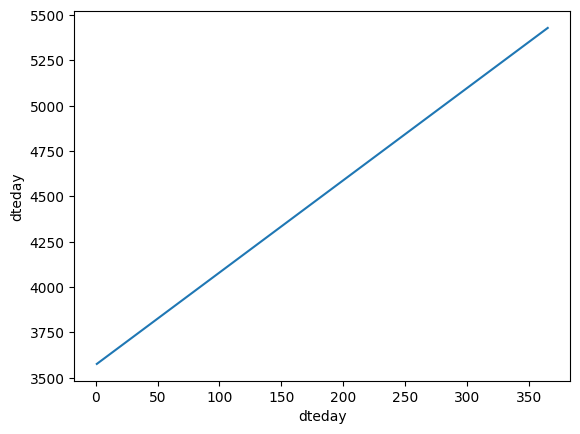

In [184]:
hari_2013 = x[0:365]
jumlah_penyewa_2013 = res.intercept + (hari_2013 * res.slope)

sns.lineplot(x = hari_2013, y = jumlah_penyewa_2013)

Didapatkan hasil proyeksi bahwa pada tahun 2013 jumlah penyewaan sepeda akan terus bertambah, sehingga bisa dilakukan peningkatan pada jumlah sepeda yang dapat disewa maupun *service* yang diberikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apakah terjadi penyewaan sepeda terbanyak?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Agustus'),
  Text(1, 0, 'Juni'),
  Text(2, 0, 'September'),
  Text(3, 0, 'Juli'),
  Text(4, 0, 'Mei'),
  Text(5, 0, 'Oktober'),
  Text(6, 0, 'April'),
  Text(7, 0, 'November'),
  Text(8, 0, 'Maret'),
  Text(9, 0, 'Desember'),
  Text(10, 0, 'Februari'),
  Text(11, 0, 'Januari')])

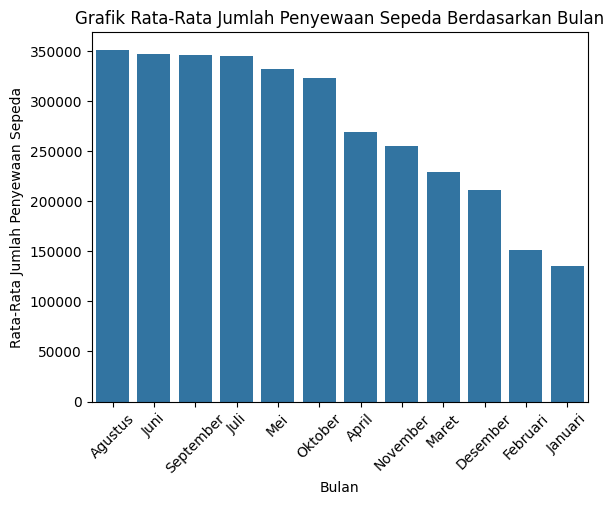

In [186]:
# Grafik perbandingan antar bulan
ax = sns.barplot(data = bulan_terbanyak, x = bulan_terbanyak.index, y = bulan_terbanyak['cnt'], order = bulan_terbanyak.index)
ax.set(xlabel='Bulan',
       ylabel='Rata-Rata Jumlah Penyewaan Sepeda',
       title='Grafik Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Bulan')
plt.xticks(rotation=45)

Jawaban: Penyewaan sepeda terbanyak terjadi pada bulan Agustus.

### Pertanyaan 2: Secara deskriptif, manakah jumlah penyewa sepeda yang lebih banyak, hari masuk atau hari libur?

[Text(0.5, 0, 'Hari'),
 Text(0, 0.5, 'Rata-Rata Jumlah Penyewaan Sepeda'),
 Text(0.5, 1.0, 'Grafik Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Hari Libur')]

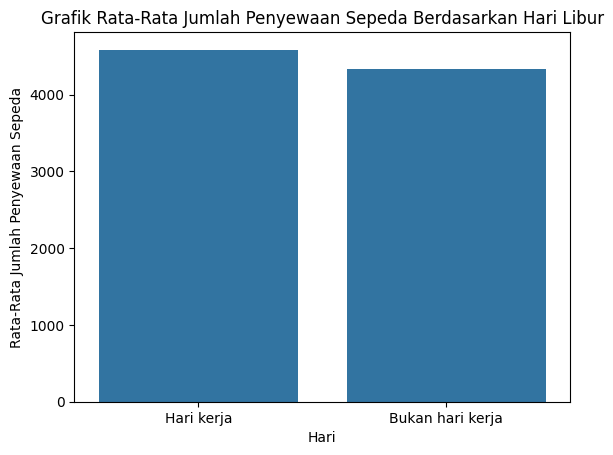

In [194]:
ax = sns.barplot(data = cnt_workingday, x = cnt_workingday.index, y = 'cnt')
ax.set(xlabel='Hari',
       ylabel='Rata-Rata Jumlah Penyewaan Sepeda',
       title='Grafik Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Hari Libur')

Jawaban: Berdasarkan hasil rata-rata di atas, didapatkan bahwa penyewa sepeda di hari masuk (hari kerja) lebih banyak daripada di hari libur (bukan hari kerja) dengan perbedaan sebesar kurang lebih 200 penyewa.

### Pertanyaan 3: Secara deskriptif, pada musim manakah jumlah penyewaan sepeda tertinggi?

[Text(0.5, 0, 'Musim'),
 Text(0, 0.5, 'Rata-Rata Jumlah Penyewaan Sepeda'),
 Text(0.5, 1.0, 'Grafik Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Musim')]

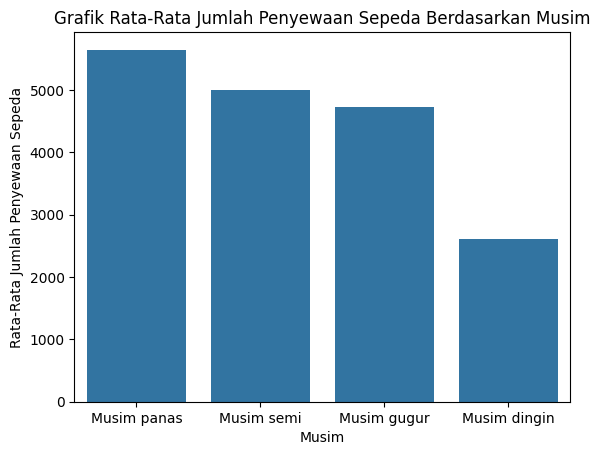

In [191]:
ax = sns.barplot(data = cnt_season, x = ['Musim panas', 'Musim semi', 'Musim gugur', 'Musim dingin'], y = 'cnt')
ax.set(xlabel='Musim',
       ylabel='Rata-Rata Jumlah Penyewaan Sepeda',
       title='Grafik Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Musim')

Jawaban: Penyewaan sepeda terbanyak terjadi pada musim panas (3: *summer*).

### Pertanyaan 4: Apakah terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012?

[Text(0.5, 0, 'Tahun'),
 Text(0, 0.5, 'Rata-Rata Jumlah Penyewaan Sepeda'),
 Text(0.5, 1.0, 'Grafik Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Tahun')]

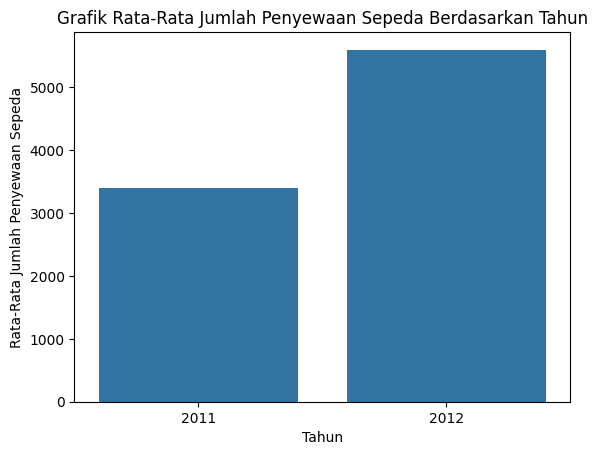

In [192]:
ax = sns.barplot(data = cnt_yr, x = ['2011', '2012'], y = 'cnt')
ax.set(xlabel='Tahun',
       ylabel='Rata-Rata Jumlah Penyewaan Sepeda',
       title='Grafik Rata-Rata Jumlah Penyewaan Sepeda Berdasarkan Tahun')

[Text(0.5, 0, 'Tanggal'),
 Text(0, 0.5, 'Jumlah Penyewaan Sepeda'),
 Text(0.5, 1.0, 'Grafik Jumlah Penyewaan Sepeda Berdasarkan Tanggal')]

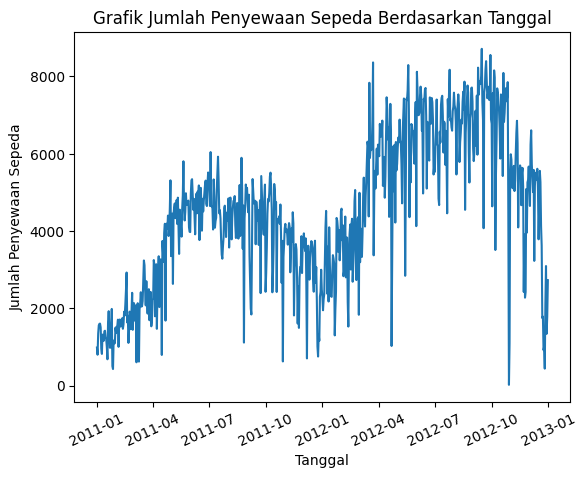

In [193]:
ax = sns.lineplot(data = day, x = "dteday", y = "cnt")
plt.xticks(rotation = 25)
ax.set(xlabel='Tanggal',
       ylabel='Jumlah Penyewaan Sepeda',
       title='Grafik Jumlah Penyewaan Sepeda Berdasarkan Tanggal')

Jawaban: Menggunakan perhitungan rata-rata didapatkan bahwa terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012. Selanjutnya, dengan metode grafik terlihat jelas bahwa terdapat peningkatan sehingga dapat disimpulkan bahwa terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012. Dari grafik juga diamati bahwa terdapat tren naik.

### Pertanyaan 5: Pada jam berapakah penyewaan sepeda mencapai puncak?

[Text(0.5, 0, 'Jam'),
 Text(0, 0.5, 'Rata-Rata Jumlah Penyewaan Sepeda'),
 Text(0.5, 1.0, 'Grafik Jumlah Penyewaan Sepeda Berdasarkan Jam')]

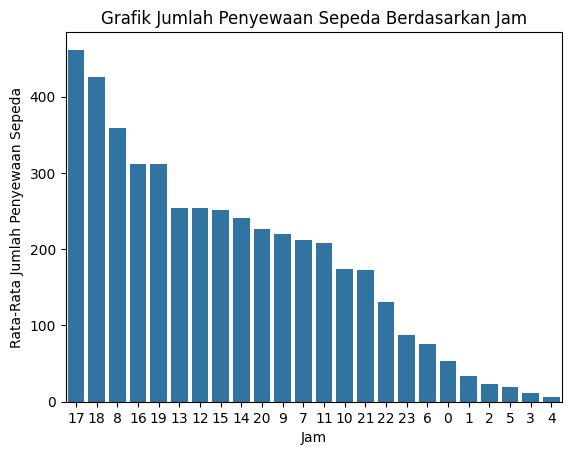

In [196]:
ax = sns.barplot(data = cnt_hour, x = cnt_hour.index, y = cnt_hour['cnt'], order = cnt_hour.index)
ax.set(xlabel='Jam',
       ylabel='Rata-Rata Jumlah Penyewaan Sepeda',
       title='Grafik Jumlah Penyewaan Sepeda Berdasarkan Jam')

Jawaban: Penyewaan sepeda mencapai puncak pada jam 17.

### Hasil Analisis Lanjutan: Proyeksi penyewaan sepeda di tahun 2013

[Text(0.5, 0, 'Hari'),
 Text(0, 0.5, 'Proyeksi Jumlah Penyewaan Sepeda'),
 Text(0.5, 1.0, 'Grafik Proyeksi Jumlah Penyewaan Sepeda Tahun 2013')]

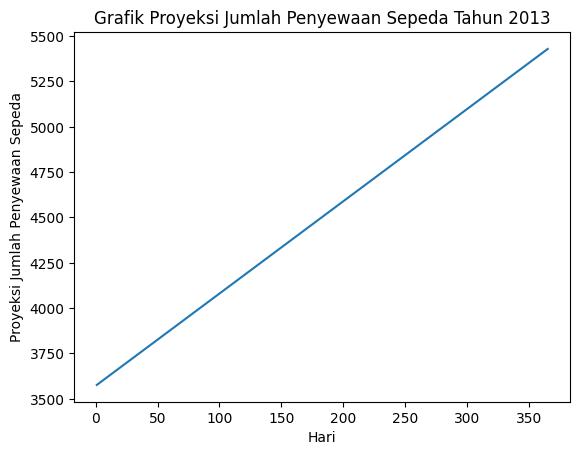

In [197]:
ax = sns.lineplot(x = hari_2013, y = jumlah_penyewa_2013)
ax.set(xlabel='Hari',
       ylabel='Proyeksi Jumlah Penyewaan Sepeda',
       title='Grafik Proyeksi Jumlah Penyewaan Sepeda Tahun 2013')

Didapatkan hasil proyeksi bahwa pada tahun 2013 jumlah penyewaan sepeda akan terus bertambah, sehingga bisa dilakukan peningkatan pada jumlah sepeda yang dapat disewa maupun *service* yang diberikan.

## Conclusion

- Penyewaan sepeda terbanyak terjadi pada bulan Agustus.
- Penyewa sepeda di hari masuk lebih banyak daripada di hari libur dengan perbedaan sebesar kurang lebih 200 penyewa.
- Penyewaan sepeda terbanyak terjadi pada musim panas.
- Terdapat peningkatan sehingga dapat disimpulkan bahwa terdapat peningkatan jumlah penyewaan sepeda dari tahun 2011 ke 2012 dan terdapat tren naik.
- Penyewaan sepeda mencapai puncak pada jam 17.
- Diproyeksikan bahwa pada tahun 2013 jumlah penyewaan sepeda akan terus bertambah, sehingga bisa dilakukan peningkatan pada jumlah sepeda yang dapat disewa maupun *service* yang diberikan.